#Covid19 Data Visualization Challenge
### Welcome to the Covid19 data visualization challenge. I'm excited to have you here.

---

###Goal
Since there are a lot of meaningful insights that can be drawn with a variety of datasets available on Covid19 pandamic, the goal of this challenge is to bring all the meaningful visualizations in one place in order to analyze what's most crucial about this Covid19 pandemic. **We will be voting on the best visualizations everyday and then make a final dashboard for public use!**

You can use  the already available open source Covid19 datasets in this notebook or any other open source datasets that you know of by importing it in this notebook.


---


###Rules

1.   Your dashboard should have a minimum of 2 charts/graphs and a maximum of 4 charts/graphs
2.   Please check the other dashboards in the notebook and try not to create the same charts/graphs again. I know it'll start to get more and more difficult, but that's the fun!
3.   Please do not play with other people's dashboard. If you need help from their code, you ca copy it on your code block and use it.
4.   The best way for it to work is to utilize your 12 hours the best. Please do not edit the notebook after you time is up as it may lead to loss of data by other challengers

###NOTE: Please keep a separate copy of your code with you at all times.

---

###Timelines
Every challenge will have 12 hours to come up with a dashboard and challenge another person in their connections.


---

###How does it work?
This notebook is publicly available in the '**View**' mode. Every challenger will share the notebook in '**Edit**' to the next challenger only. This will ensure that the edit access is only to those people who are challenged for this.



1.   ***Step 1***: Mount your drive by running the first code block
2.   ***Step 2***: Import any libraries that you may need in the second code block
3.   ***Step 3***: Create a new text block at the bottom of this notebook with your name and LinkedIn URL
4.   ***Step 4***: Create a new code clock beoow your text block and make your dashboard

###NOTE: Please remember to click ***File > Save*** frequently so that you don't lose your data.


---

###How to challenge the next person?


1.   Ask him/her the email ID
2.   Click on '***Share***' button on the top right of this notebook and give edit access. ***PLEASE DO NOT PROVIDE EDIT ACCESS TO ANYONE OTHER THAN YOUR NEXT CHALLENGER/S***
3.   Share the original post on LinedIn and tag the next challenger so that everyone's on the same page.

---

###Available Datasets

***NOTE: If you use any dataset other than what's mentioned below, please add it in this list for then next one to use.***

1.   https://www.worldometers.info/coronavirus/#countries
2.   https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports
3.   https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
4.   https://github.com/CSSEGISandData/COVID-19
5.   https://coronavirus.jhu.edu/map.html
6.   https://github.com/nytimes/covid-19-data/blob/master/us-counties.csv
7.   Hospital conditions: https://covid19.healthdata.org/projections?linkId=85347308
8.   US Census Data: https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/state/detail/SCPRC-EST2019-18+POP-RES.csv





In [0]:
# Please add all your import library commands here
!pip install geopandas
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd
import seaborn as sns
import numpy as np
import requests
import geopandas as gpd
import plotly.graph_objects as go
import plotly.express as px
import folium
from folium import plugins
!pip install squarify
import squarify 
from plotly.subplots import make_subplots
import matplotlib.dates as mdates
import plotly.figure_factory as ff
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import json 
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

     |████████████████████████████████| 931kB 1.4MB/s 
     |████████████████████████████████| 14.7MB 13.5MB/s 
     |████████████████████████████████| 10.4MB 36.5MB/s 


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Challenger 1: Nitin Saini
LinkedIn: https://www.linkedin.com/in/saininitinkr/

KeyError: ignored

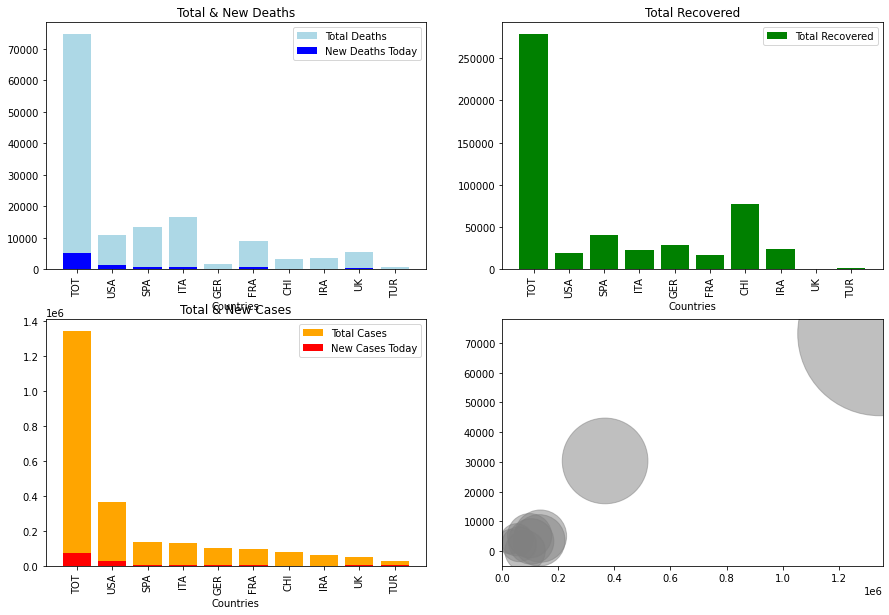

In [0]:
url = 'https://www.worldometers.info/coronavirus/#countries'
header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}
r = requests.get(url, headers=header)
corona = pd.read_html(r.text)[1]
corona.fillna(0, inplace=True)
corona['CountryCode'] = corona['Country,Other'].str[:3].str.upper() 
# Taking top 10 affected countries due to coronavirus
corona_data = corona.sort_values(by=['TotalCases'], ascending=False).iloc[1:11, :]

if corona_data.NewCases.dtype != 'int64':
    # corona_data.NewCases = corona_data.NewCases.map(lambda x: x.lstrip('+'))
    corona_data.NewCases = corona_data.NewCases.replace(',','', regex=True).astype('int')

if corona_data.TotalCases.dtype != 'int64':
    corona_data.TotalCases = corona_data.TotalCases.replace(',','', regex=True).astype('int')

if corona_data.TotalDeaths.dtype != 'int64':
    corona_data.TotalDeaths = corona_data.TotalDeaths.replace(',','', regex=True).astype('int')

if corona_data.NewDeaths.dtype != 'int64':
    # corona_data.NewDeaths = corona_data.NewDeaths.map(lambda x: x.lstrip('+'))
    corona_data.NewDeaths = corona_data.NewDeaths.replace(',','', regex=True).astype('int')

if corona_data.TotalRecovered.dtype != 'int64':
    corona_data.TotalRecovered = corona_data.TotalRecovered.replace(',','', regex=True).astype('int')

fig, axes = plt.subplots(2,2, figsize=(15,10))

axes[0,0].clear
axes[0,0].bar(corona_data['Country,Other'], corona_data['TotalDeaths'], color='lightblue')
axes[0,0].bar(corona_data['Country,Other'], corona_data['NewDeaths'], color='blue')
axes[0,0].set_xlabel('Countries')
axes[0,0].set_title('Total & New Deaths')
axes[0,0].set_xticklabels(corona_data['CountryCode'], rotation=90)
axes[0,0].legend(["Total Deaths", "New Deaths Today"])

axes[0,1].clear
axes[0,1].bar(corona_data['Country,Other'], corona_data['TotalRecovered'], color='green')
axes[0,1].set_xlabel('Countries')
axes[0,1].set_title('Total Recovered')
axes[0,1].set_xticklabels(corona_data['CountryCode'], rotation=90)
axes[0,1].legend(["Total Recovered"])

axes[1,0].clear
axes[1,0].bar(corona_data['Country,Other'], corona_data['TotalCases'], color='orange')
axes[1,0].bar(corona_data['Country,Other'], corona_data['NewCases'], color='red')
axes[1,0].set_xlabel('Countries')
axes[1,0].set_title('Total & New Cases')
axes[1,0].set_xticklabels(corona_data['CountryCode'], rotation=90)
axes[1,0].legend(["Total Cases", "New Cases Today"])

axes[1,1].clear
axes[1,1].set_xlim(0,corona_data.TotalCases.max()+10000)
axes[1,1].set_ylim(-5000, corona_data.NewCases.max()+5000)
axes[1,1].scatter(corona_data.TotalCases, corona_data.NewCases, 
                            alpha = 0.5, 
                            s = corona_data.TotalCases/50 , 
                            color = 'gray')
for line in range(0,corona_data.shape[0]):
      axes[1,1].text(corona_data.TotalCases[line], corona_data.NewCases[line], 
                    corona_data['CountryCode'][line], horizontalalignment='center', 
                    size='small', color='black')

plt.suptitle('Coronavirus Dashboard [Updated Daily]')
fig.tight_layout(rect=[0, 0.03, 1, 0.90])
plt.show()

In [0]:
covid19data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
covid19states = pd.DataFrame(covid19data['Country/Region'])
covid19data.drop(covid19data.iloc[:, :-22], axis=1, inplace=True)
covid19data = covid19data.diff(axis=1)
covid19data['total_cases'] = covid19data.sum(axis=1)
covid19data.drop(covid19data.iloc[:, :-22], axis=1, inplace=True)
covid19data = covid19states.merge(covid19data, left_index = True, right_index = True)
covid19data = covid19data.sort_values(by='total_cases', ascending=False)
covid19data.columns = ["Country","D21-7", "D21-6", "D21-5", "D21-4", "D21-3", "D21-2", "D21-1",
                   "D14-7", "D14-6", "D14-5", "D14-4", "D14-3", "D14-2", "D14-1",
                   "D7-7", "D7-6", "D7-5", "D7-4", "D7-3", "D7-2", "D7-1",
                   "total_deaths"]
covid19data['total_deaths'] = covid19data['total_deaths'].astype('object')

for column in covid19data.columns:
  if covid19data[column].dtype == 'float':
    covid19data[column] = covid19data[column].astype('int')

colsLast7 = [('Last7Days', col) for col in covid19data.columns if 'D7-' in col]
colsLast14 = [('Last14Days', col) for col in covid19data.columns if 'D14-' in col]
colsLast21 = [('Last21Days', col) for col in covid19data.columns if 'D21-' in col]
totalStats = [('TotalStats', col) for col in covid19data.columns if 'total' in col]
totalState = [('Countries', col) for col in covid19data.columns if 'Country' in col]
th_props = [
  ('font-size', '12px'),
  ('text-align', 'left'),
  ('font-weight', 'bold'),
  ('color', '#6d6d6d'),
  ('background-color', '#f7f7f9')
  ]

# Set CSS properties for td elements in dataframe
td_props = [
  ('font-size', '11px')
  ]
styles = [
  dict(selector="th", props=th_props),
  dict(selector="td", props=td_props)
  ]

covid19data.columns = pd.MultiIndex.from_tuples(totalState + colsLast21 + colsLast14 + colsLast7 + totalStats)
covid19data = covid19data.style.background_gradient(cmap='Reds', axis=1).set_table_styles([{'selector': 'th', 'props': [('font-size', '10pt')]}]).set_table_styles(styles)
covid19data

#Challenger 2: Luca Chuang
LinkedIn: https://www.linkedin.com/in/shen-wei-luca-chuang-33978b57

In [0]:
# Map Data
url = 'https://www.worldometers.info/coronavirus/country/us/'
r = requests.get(url)
us_data = pd.read_html(r.text)[1]
us_data = us_data.fillna(0)

x = ["Diamond Princess Cruise","Wuhan Repatriated","Puerto Rico",
     "Alaska","Guam", "Northern Mariana Islands","United States Virgin Islands",
     "Hawaii", "District Of Columbia", "Total:"]

us_data = us_data[~us_data['USAState'].isin(x)]
us_data = us_data.rename(columns={'USAState': 'State'})

df = pd.read_csv('https://raw.githubusercontent.com/jasperdebie/VisInfo/master/us-state-capitals.csv')
df = df.drop("description", axis=1)
x = ['Alaska', 'Hawaii']
df = df[~df['name'].isin(x)]
df = df.rename(columns= {"name":"State"})

bubble_data = df.merge(us_data, on="State")
bubble_data['text'] = bubble_data['State'] + '<br>TotalCases:' + (bubble_data['TotalCases']).astype(str)
bubble_data = bubble_data.sort_values(by = ["TotalCases"], ascending=False)

# Line Data
total_link = 'https://covid.ourworldindata.org/data/ecdc/total_cases.csv'
total_file = pd.read_csv(total_link)
total_case = pd.DataFrame(total_file.iloc[20:,0:2])
total_case['New_Case']=total_case['World'].diff()
total_case=pd.DataFrame(total_case.iloc[1:,:])
total_case = total_case.rename(columns={"date": "Date","World": "Total_Case"})
total_case['Date']= pd.to_datetime(total_case['Date'])

ntdoy_URL = "https://finance.yahoo.com/quote/NTDOY/history?period1=1579564800&period2=1585872000&interval=1d&filter=history&frequency=1d"
ntdoy = pd.read_html(ntdoy_URL)[0]
ntdoy = ntdoy.drop(["Open","High", "Low", "Adj Close**",  "Volume"], axis=1)
ntdoy = ntdoy.iloc[:-1,:]
ntdoy["Date"] = pd.to_datetime(ntdoy['Date'])
ntdoy['Close*']= ntdoy['Close*'].astype("float")
ntdoy = ntdoy.rename(columns={"Close*":"Close"})
ntdoy.sort_values("Date")
total_case
line_plot = total_case.merge(ntdoy, on="Date")

In [0]:
# Plot one
limits = [(0,1),(2,10),(11,20),(21,30),(31,48)] # Ranking
colors = ["maroon","red","orange","grey","lightgrey"]
names = ["Top 1", "Top 10", "11~20","21~30","30~48"]
scale = 30

fig = go.Figure()

for i in range(len(limits)):
    lim = limits[i]
    df_sub = bubble_data[lim[0]:lim[1]]
    fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lon = df_sub['longitude'],
        lat = df_sub['latitude'],
        text = df_sub['text'],
        marker = dict(
            size = df_sub['TotalCases']/scale,
            color = colors[i],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'),
        showlegend=True,
        name = names[i]
        ))
    

fig.update_layout(
        title_text = 'US states Confirmed Cases <br>(Click legend to toggle traces)',
        showlegend = True,
        geo = dict(
            scope = 'usa',
            landcolor = 'rgb(217, 217, 217)'))

fig.show()

In [0]:
# Plot two

fig = make_subplots(specs=[[{"secondary_y": True}]])


fig.add_trace(go.Scatter(x=line_plot['Date'], y=line_plot['Total_Case'],
                    mode='lines+markers', name='Total Cases'),
              secondary_y = False)
fig.add_trace(go.Scatter(x=line_plot['Date'], y=line_plot['Close'],
                    mode='lines+markers',name='Nintendo Price'),
              secondary_y=True)

# Set x-axis title
fig.update_xaxes(title_text="Date")
# Set y-axes titles
fig.update_yaxes(title_text="Total Cases(World)", secondary_y=False)
fig.update_yaxes(title_text="Nintendo Price", secondary_y=True)


fig.update_layout(
        title_text = "Nintendo Stock Price with World Rising Covid19 Cases",
        showlegend = True)

fig.show()



#Challenger 3: Smridhi Mangla
LinkedIn: https://www.linkedin.com/in/smridhi-mangla-4404/


The Data: https://github.com/CSSEGISandData/COVID-19

In [0]:
import pandas as pd
#download confirmed cases data from JHU dashboard
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
df_confirmed = pd.read_csv(url)

#download death cases data from JHU dashboard
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
df_death = pd.read_csv(url)

#top ten impacted countries 
df_tmp_subset = df_confirmed.drop(['Province/State','Lat','Long'],axis=1)
df_tmp_subset = pd.DataFrame(df_tmp_subset.groupby(['Country/Region'],as_index=False).sum())
df_tmp_subset = df_tmp_subset.sort_values(by=df_confirmed.columns[len(df_confirmed.columns)-1], ascending=False)
df_topten_countries = df_tmp_subset[0:10]

#death count in the top ten most impacted countries 
df_tmp_subset_d = df_death.drop(['Province/State','Lat','Long'],axis=1)
df_tmp_subset_d = pd.DataFrame(df_tmp_subset_d.groupby(['Country/Region'],as_index=False).sum())
df_tmp_subset_d = df_tmp_subset_d[df_tmp_subset_d['Country/Region'].isin(df_topten_countries['Country/Region'].values.flatten().tolist())]
df_topten_death = df_tmp_subset_d.sort_values(by=df_tmp_subset_d.columns[len(df_tmp_subset_d.columns)-1], ascending=False)

In [0]:
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

x_axis = df_topten_countries.columns
fig = go.Figure()
annotations = []

for i in range(0,10,1):
  y = df_topten_countries.iloc[i,1:].values.flatten().tolist()
  fig.add_trace(go.Scatter(x=x_axis[1:], y=y,
                    mode='lines+markers',
                    name=df_topten_countries.iloc[i,0]))

# Title
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Confirmed Case Trend of Top Ten Impacted Countries',
                              font=dict(family='Arial',
                                        size=18,
                                        color='rgb(37,37,37)'),
                              showarrow=False))
fig.update_layout(annotations=annotations)
fig.show()

# Add table data
table_data = [['Country', 'Confirmed', 'Deaths'],
              [df_topten_countries.iloc[0,0], df_topten_countries.iloc[0,-1], df_topten_death.iloc[0,-1]],
              [df_topten_countries.iloc[1,0], df_topten_countries.iloc[1,-1], df_topten_death.iloc[1,-1]],
              [df_topten_countries.iloc[2,0], df_topten_countries.iloc[2,-1], df_topten_death.iloc[2,-1]],
              [df_topten_countries.iloc[3,0], df_topten_countries.iloc[3,-1], df_topten_death.iloc[3,-1]],
              [df_topten_countries.iloc[4,0], df_topten_countries.iloc[4,-1], df_topten_death.iloc[4,-1]],
              [df_topten_countries.iloc[5,0], df_topten_countries.iloc[5,-1], df_topten_death.iloc[5,-1]],
              [df_topten_countries.iloc[6,0], df_topten_countries.iloc[6,-1], df_topten_death.iloc[6,-1]],
              [df_topten_countries.iloc[7,0], df_topten_countries.iloc[7,-1], df_topten_death.iloc[7,-1]],
              [df_topten_countries.iloc[8,0], df_topten_countries.iloc[8,-1], df_topten_death.iloc[8,-1]],
              [df_topten_countries.iloc[9,0], df_topten_countries.iloc[9,-1], df_topten_death.iloc[9,-1]]]

# Initialize a figure with ff.create_table(table_data)
fig = ff.create_table(table_data, height_constant=40)

# Add graph data
x_axis_bar = df_topten_countries.iloc[:,0].values.flatten().tolist()
conf_count = df_topten_countries.iloc[:,-1].values.flatten().tolist()
death_count = df_topten_death.iloc[:,-1].values.flatten().tolist()

# Make traces for graph
trace1 = go.Bar(x=x_axis_bar, y=conf_count, xaxis='x2', yaxis='y2',
                marker=dict(color='#0099ff'),
                name='Confirmed Cases')
trace2 = go.Bar(x=x_axis_bar, y=death_count, xaxis='x2', yaxis='y2',
                marker=dict(color='#ff001a'),
                name='Death Cases')

# Add trace data to figure
fig.add_traces([trace1, trace2])

# initialize xaxis2 and yaxis2
fig['layout']['xaxis2'] = {}
fig['layout']['yaxis2'] = {}

# Edit layout for subplots
fig.layout.yaxis.update({'domain': [0, .45]})
fig.layout.yaxis2.update({'domain': [.6, 1]})

# The graph's yaxis2 MUST BE anchored to the graph's xaxis2 and vice versa
fig.layout.yaxis2.update({'anchor': 'x2'})
fig.layout.xaxis2.update({'anchor': 'y2'})
fig.layout.yaxis2.update({'title': 'Case Count'})

# Update the margins to add a title and see graph x-labels.
fig.layout.margin.update({'t':75, 'l':50})
fig.layout.update({'title': 'COVID19 Confirmed and Death Case count'})

# Update the height because adding a graph vertically will interact with
# the plot height calculated for the table
fig.layout.update({'height':600})

# Plot!
fig.show()

#Challenger 4: Sonam Prakash
LinkedIn: https://www.linkedin.com/in/sonamprakash/

In [0]:
# Pull the data from worldometers.info
url = 'https://www.worldometers.info/coronavirus/country/us/'
header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}
r = requests.get(url, headers=header)
corona = pd.read_html(r.text)[1]
# Fill null values with zero
corona.fillna(0, inplace=True)

#Create population dataframe - This data was extracted from (https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/state/detail/

#Use this to create your dataframe
# x = pd.read_csv('https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/state/detail/SCPRC-EST2019-18+POP-RES.csv')
# x.head()

population = pd.DataFrame({'USAState':['Alabama','Alaska','Arizona','Arkansas','California','Colorado','Connecticut','Delaware',
                                 'District of Columbia','Florida','Georgia','Hawaii','Idaho','Illinois','Indiana','Iowa','Kansas',
                                 'Kentucky','Louisiana','Maine','Maryland','Massachusetts','Michigan','Minnesota','Mississippi','Missouri',
                                 'Montana','Nebraska','Nevada','New Hampshire','New Jersey','New Mexico','New York','North Carolina',
                                 'North Dakota','Ohio','Oklahoma','Oregon','Pennsylvania','Rhode Island','South Carolina','South Dakota',
                                 'Tennessee','Texas','Utah','Vermont','Virginia','Washington','West Virginia','Wisconsin','Wyoming'],
                           'Pop':[4903185,731545,7278717,3017804,39512223,5758736,3565287,973764,705749,21477737,10617423,1415872,1787065,
                               12671821,6732219,3155070,2913314,4467673,4648794,1344212,6045680,6892503,9986857,5639632,2976149,6137428,
                               1068778,1934408,3080156,1359711,8882190,2096829,19453561,10488084,762062,11689100,3956971,4217737,12801989,
                               1059361,5148714,884659,6829174,28995881,3205958,623989,8535519,7614893,1792147,5822434,578759]})

# Clean data 
x = ['Diamond Princess Cruise',
     'Wuhan Repatriated',
     'Total:',
     'Grand Princess', 
     'District Of Columbia',
     'Puerto Rico', 
     'Guam',
     'Northern Mariana Islands',
     'United States Virgin Islands']
corona = corona[~corona['USAState'].isin(x)]
population=population[~population['USAState'].isin(x)]

#Pull geographical data
loc = pd.read_csv('https://raw.githubusercontent.com/jasperdebie/VisInfo/master/us-state-capitals.csv')
loc = loc.drop("description", axis=1)

# merge Corona, Population, geographical data
merge_df=pd.merge(corona, population, on='USAState')
data=pd.merge(merge_df,loc,left_on='USAState', right_on='name')
data = data.drop(['name'],axis=1)
#Create new dervied columns
data['POP(in million)'] = data['Pop']/1000000
data['Fatality Rate'] = (data['TotalDeaths']/data['TotalCases'])*100
data['Case/pop'] = (data['TotalCases']/data['Pop'])
#Convert datatypes
data['TotalCases']=data['TotalCases'].astype(int)
data['ActiveCases']=data['ActiveCases'].astype(int)
data['TotalDeaths']=data['TotalDeaths'].astype(int)
data['NewDeaths']=data['NewDeaths'].astype(int)
data['Recovered Cases']=(data['TotalCases']-data['ActiveCases']-data['TotalDeaths'])

# Pull USA state geographical data for map
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/us-states.json'

# Make an empty map
map = folium.Map(location=[36.778259, -119.417931], zoom_start=4)

# Add for loop to add bubble marker for each data row
for i in range(0,len(data)):
   folium.Circle(
      location=[data.iloc[i]['latitude'], data.iloc[i]['longitude']],
      popup=str(data.iloc[i]['Fatality Rate']),
      radius=int(data.iloc[i]['Fatality Rate']*10000),
      color='crimson',
      fill=True,
      fill_color='crimson'
      ).add_to(map)

title_html = '''
             <h3 align="center" style="font-size:20px"><b>Fatality Rate </b></h3>
             '''
map.get_root().html.add_child(folium.Element(title_html))

map

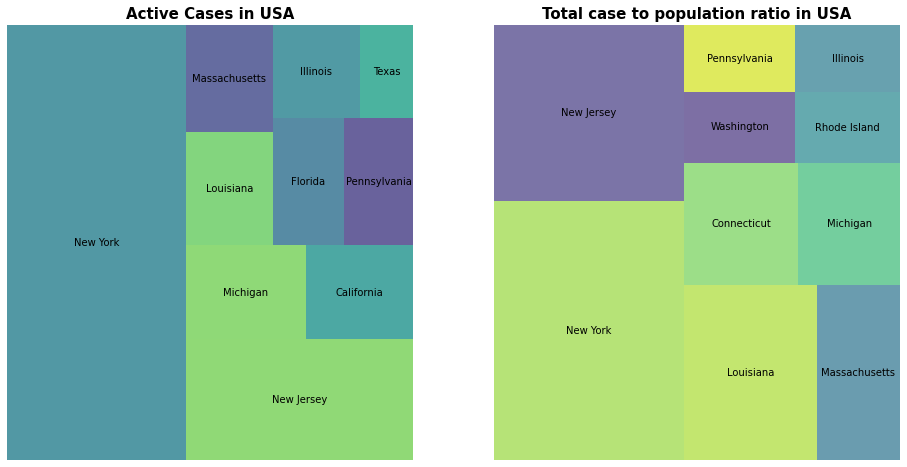

In [0]:
fig, axes = plt.subplots(1,2, figsize=(16,8))
# treemap showing top 10 states with most active cases
df_new=data.sort_values(by='ActiveCases', ascending = False).head(10)
squarify.plot(sizes=df_new['ActiveCases'], label=df_new['USAState'], alpha=0.8, ax=axes[0])
axes[0].set_title("Active Cases in USA",fontsize=15,fontweight="bold")
axes[0].axis('off')

# treemap showing total case to population ratio for each state.
df_new_1=data.sort_values(by='Case/pop', ascending = False).head(10)
squarify.plot(sizes=df_new_1['Case/pop'], label=df_new_1['USAState'], alpha=0.7, ax=axes[1])
axes[1].set_title("Total case to population ratio in USA",fontsize=15,fontweight="bold")
axes[1].axis('off')

plt.show()

# Challenger 5: Aanchal Gargi

LinkedIn: https://www.linkedin.com/in/aanchal-gargi-698767b1/



In [0]:
url = 'https://www.worldometers.info/coronavirus/country/us/'
header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}
r = requests.get(url, headers=header)
Covid_cases = pd.read_html(r.text)[1]

# Fill null values with zero
Covid_cases.fillna(0, inplace=True)

#cleaning data
x = ['Diamond Princess Cruise',
     'Wuhan Repatriated',
     'Total:',
     'Grand Princess', 
     'District Of Columbia',
     'Puerto Rico', 
     'Guam',
     'Northern Mariana Islands',
     'United States Virgin Islands']
Covid_cases = Covid_cases[~Covid_cases['USAState'].isin(x)]

#creating a new column Recovered cases
Covid_cases['RecoveredCases'] = Covid_cases['TotalCases'] - (Covid_cases['TotalDeaths'] + Covid_cases['ActiveCases'])

#subsetting top 10 countries
Covid_cases10 = Covid_cases.iloc[:10]

names = Covid_cases10['USAState']

totals = [i+j+k for i,j,k in zip(Covid_cases10['RecoveredCases'], Covid_cases10['TotalDeaths'], Covid_cases10['ActiveCases'])]
RecoveredCases = [i / j * 100 for i,j in zip(Covid_cases10['RecoveredCases'], totals)]
TotalDeaths = [i / j * 100 for i,j in zip(Covid_cases10['TotalDeaths'], totals)]
ActiveCases = [i / j * 100 for i,j in zip(Covid_cases10['ActiveCases'], totals)]

fig = go.Figure(data=[
    go.Bar(name='Recovered Cases', x=names, y=RecoveredCases, marker_color='#4C516D'),
    go.Bar(name='Total Deaths', x=names, y=TotalDeaths, marker_color='#588BAE'),
    go.Bar(name='Active Cases', x=names, y=ActiveCases, marker_color='#B0DFE5')
])

fig.layout.update({'title': 'Total cases distributed as Recovered, Deaths and Active cases for top 10 states affected in US'})

fig.update_layout(title='Total cases distributed as Recovered, Deaths and Active cases for top 10 states affected in US',
                   xaxis_title='US States',
                   yaxis_title='Percentage')

# Change the bar mode
fig.update_layout(barmode='stack')
fig.show()

In [0]:
#Creating dataframe Popluation
population = pd.DataFrame({'USAState':['Alabama','Alaska','Arizona','Arkansas','California','Colorado','Connecticut','Delaware',
                                 'District of Columbia','Florida','Georgia','Hawaii','Idaho','Illinois','Indiana','Iowa','Kansas',
                                 'Kentucky','Louisiana','Maine','Maryland','Massachusetts','Michigan','Minnesota','Mississippi','Missouri',
                                 'Montana','Nebraska','Nevada','New Hampshire','New Jersey','New Mexico','New York','North Carolina',
                                 'North Dakota','Ohio','Oklahoma','Oregon','Pennsylvania','Rhode Island','South Carolina','South Dakota',
                                 'Tennessee','Texas','Utah','Vermont','Virginia','Washington','West Virginia','Wisconsin','Wyoming'],
                           'Pop':[4903185,731545,7278717,3017804,39512223,5758736,3565287,973764,705749,21477737,10617423,1415872,1787065,
                               12671821,6732219,3155070,2913314,4467673,4648794,1344212,6045680,6892503,9986857,5639632,2976149,6137428,
                               1068778,1934408,3080156,1359711,8882190,2096829,19453561,10488084,762062,11689100,3956971,4217737,12801989,
                               1059361,5148714,884659,6829174,28995881,3205958,623989,8535519,7614893,1792147,5822434,578759]})

#Data cleaning
x = ['Diamond Princess Cruise',
     'Wuhan Repatriated',
     'Total:',
     'Grand Princess', 
     'District Of Columbia',
     'Puerto Rico', 
     'Guam',
     'Northern Mariana Islands',
     'United States Virgin Islands']
population=population[~population['USAState'].isin(x)]

#merging the datasets Population and Covid_cases
df = pd.merge(Covid_cases, population, how='left', on='USAState')

#calculating Population%
df['pop%'] = (df['TotalCases']/df['Pop'])*100
df['pop%'] = round(df['pop%'],4)
#plot

fig = go.Figure(go.Scatter(mode="markers", x=df['USAState'], y=df['pop%'], marker_size=15))

fig.update_layout(title='Percentage of Population affected from COVID-19 based on states in US',
                   xaxis_title='US States',
                   yaxis_title='Percentage of Population affected')

fig.show()

#Challenger 6: Dibyatanu Banik
LinkedIn: www.linkedin.com/in/dibyatanubanik

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Extract Data from source

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
CONFIRMED = pd.read_csv(url)

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
DEATHS = pd.read_csv(url)

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
RECOVERED = pd.read_csv(url)




In [0]:
# included 'Total' column
CONFIRMED['Total']= CONFIRMED.iloc[:, -1]
DEATHS['Total'] = DEATHS.iloc[:, -1]
RECOVERED['Total'] = RECOVERED.iloc[:, -1]

In [0]:
### ----CONFIRMED------------
Country_confirm1 = pd.DataFrame(CONFIRMED.iloc[:, 1])  # take the all the rows and 1st column
Country_confirm2 = pd.DataFrame(CONFIRMED.iloc[:, 4:len(CONFIRMED)]) # take all the rows and  date columns
Country_confirm = Country_confirm1.reset_index(drop=True).merge(Country_confirm2.reset_index(drop=True), left_index=True, right_index=True) # merge the dataframes
Country_confirm = Country_confirm.groupby('Country/Region') # group by country for uniques countries 
Country_confirm = Country_confirm.sum() # summing the group by country for uniques countries 
Country_confirm = Country_confirm.sort_values(by='Total', ascending=False)

In [0]:
#### ----CONFIRMED------------
Country_confirm = Country_confirm.iloc[:, 0:(len(Country_confirm.columns)-1)]
Country_confirm = Country_confirm.head(10) # first 10 rows after sorting
Country_confirm= pd.DataFrame(Country_confirm.T) #transpose the dataframe
Country_confirm.reset_index( inplace=True) # setting the index of the final dataframe

In [0]:
#### ----CONFIRMED------------
Country_confirm.rename(columns={ Country_confirm.columns[0]: "Date" }, inplace = True) #1st Column renamed to  
Country_confirm['Date'] = pd.to_datetime(Country_confirm.Date)  # change to datatype of 'Date' Column to datetime
Country_confirm = pd.DataFrame(Country_confirm.set_index('Date')) # set Date column as Index
Country_confirm = Country_confirm.reset_index() # reset the index

In [0]:
df1=pd.read_csv("https://raw.githubusercontent.com/Dibyatanu91/Dibyatanu91/master/Lockdown%20-%20Copy.csv") # 2nd dataframe from source
df1['DATE_IMPLEMENTED'] =pd.to_datetime(df1.DATE_IMPLEMENTED)


In [0]:
US = df1[(df1['COUNTRY'] == 'United States of America')]
Italy = df1[(df1['COUNTRY'] == 'Italy')]
India =df1[(df1['COUNTRY'] == 'India')]
Spain =df1[(df1['COUNTRY'] == 'Spain')]

In [0]:
#------------US----------------------------
a=Country_confirm.iloc[:, 0:2]
a.set_index('Date',inplace=True)
b = US.iloc[:,[1,3,4]]
b.set_index('DATE_IMPLEMENTED', inplace=True)

#------------Italy----------------------------
c= pd.DataFrame(Country_confirm, columns = ['Date','Italy']) 
c.set_index('Date',inplace=True)
d = Italy.iloc[:,[1,3,4]]
d.set_index('DATE_IMPLEMENTED', inplace=True)

#------------Spain----------------------------
e= pd.DataFrame(Country_confirm, columns = ['Date','Spain']) 
e.set_index('Date',inplace=True)
f = Spain.iloc[:,[1,3,4]]
f.set_index('DATE_IMPLEMENTED', inplace=True)

In [0]:
# Plot for United States inside function
import matplotlib.pyplot as plt

def US_plot():
    fig, ax = plt.subplots(figsize=(30, 8))
    ax.set_xlabel('Days/Month', fontsize=30)
    ax.set_ylabel('Count', fontsize=30)
    ax.tick_params( labelsize=13)
    a.plot(ax=ax,linewidth =5,style='--')
    fig.suptitle('Government Measures in the United States over Time',fontsize = 35)
    for index, row in b.iterrows():
        ax.annotate(row['MEASURE'], xy=(index, 10000),family ='serif', size = 'large', xycoords='data',rotation =90,  bbox=dict(boxstyle="round",pad=.2,lw=1,facecolor=row['COLOR']))

In [0]:
# Plot for Italy inside function
import matplotlib.pyplot as plt

def Italy_plot():
    fig, ax = plt.subplots(figsize=(30, 8))
    ax.set_xlabel('Days/Month', fontsize=30)
    ax.set_ylabel('Count', fontsize=30)
    ax.tick_params( labelsize=13)
    c.plot(ax=ax,linewidth =5,style='--')
    fig.suptitle('Government Measures in Italy over Time',fontsize = 35)


    for index, row in d.iterrows():
        ax.annotate(row['MEASURE'], xy=(index, 10000),family ='serif', size = 'large', xycoords='data',rotation =90,  bbox=dict(boxstyle="round",pad=.2,lw=1,facecolor=row['COLOR']))

In [0]:
# Plot for Spain inside function
import matplotlib.pyplot as plt

def Spain_plot():
    fig, ax = plt.subplots(figsize=(30, 8))
    ax.set_xlabel('Days/Month', fontsize=30)
    ax.set_ylabel('Count', fontsize=30)
    ax.tick_params( labelsize=13)
    e.plot(ax=ax,linewidth =5,style='--')
    fig.suptitle('Government Measures in Spain over Time',fontsize = 35)


    for index, row in f.iterrows():
        ax.annotate(row['MEASURE'], xy=(index, 10000),family ='serif', size = 'large', xycoords='data',rotation =90,  bbox=dict(boxstyle="round",pad=.2,lw=1,facecolor=row['COLOR']))

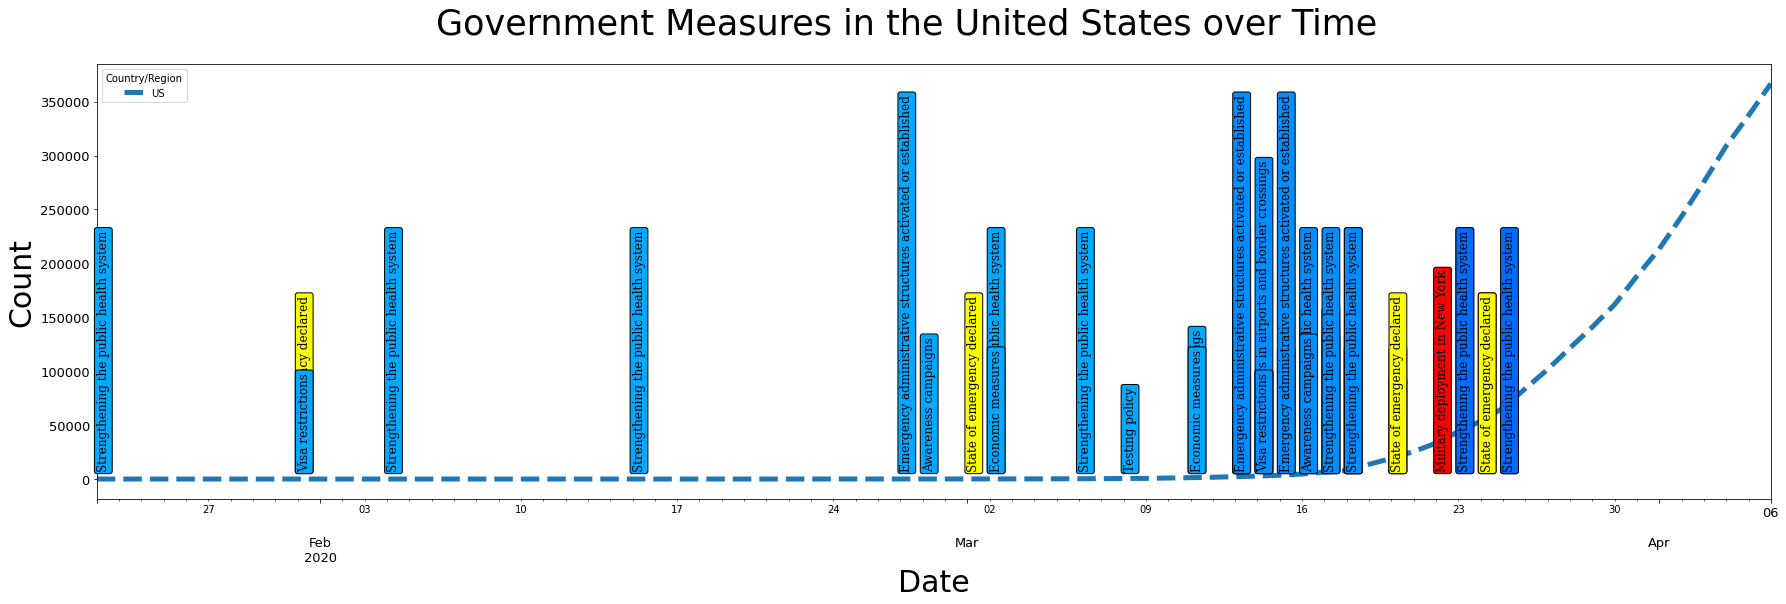

In [0]:
US_plot() # calling function

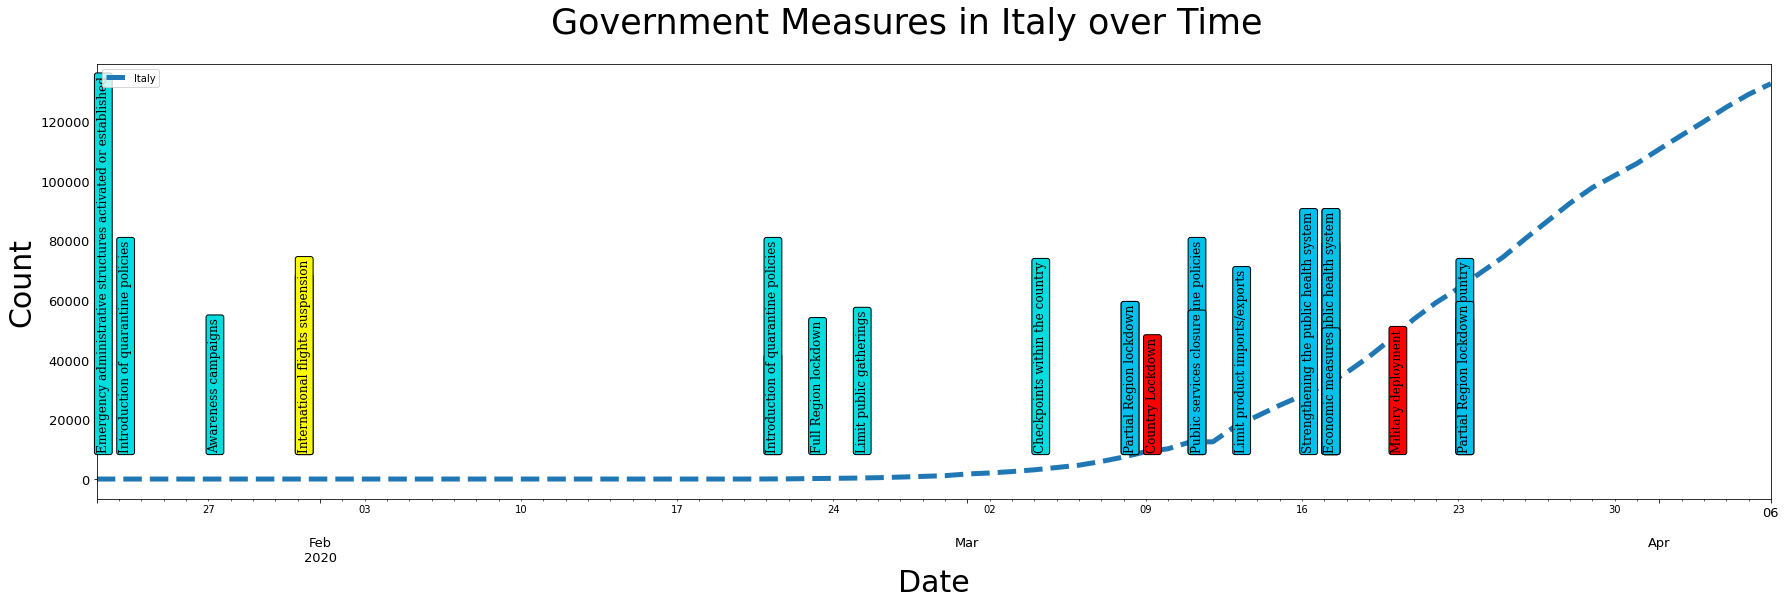

In [0]:
Italy_plot() # Csalling Function

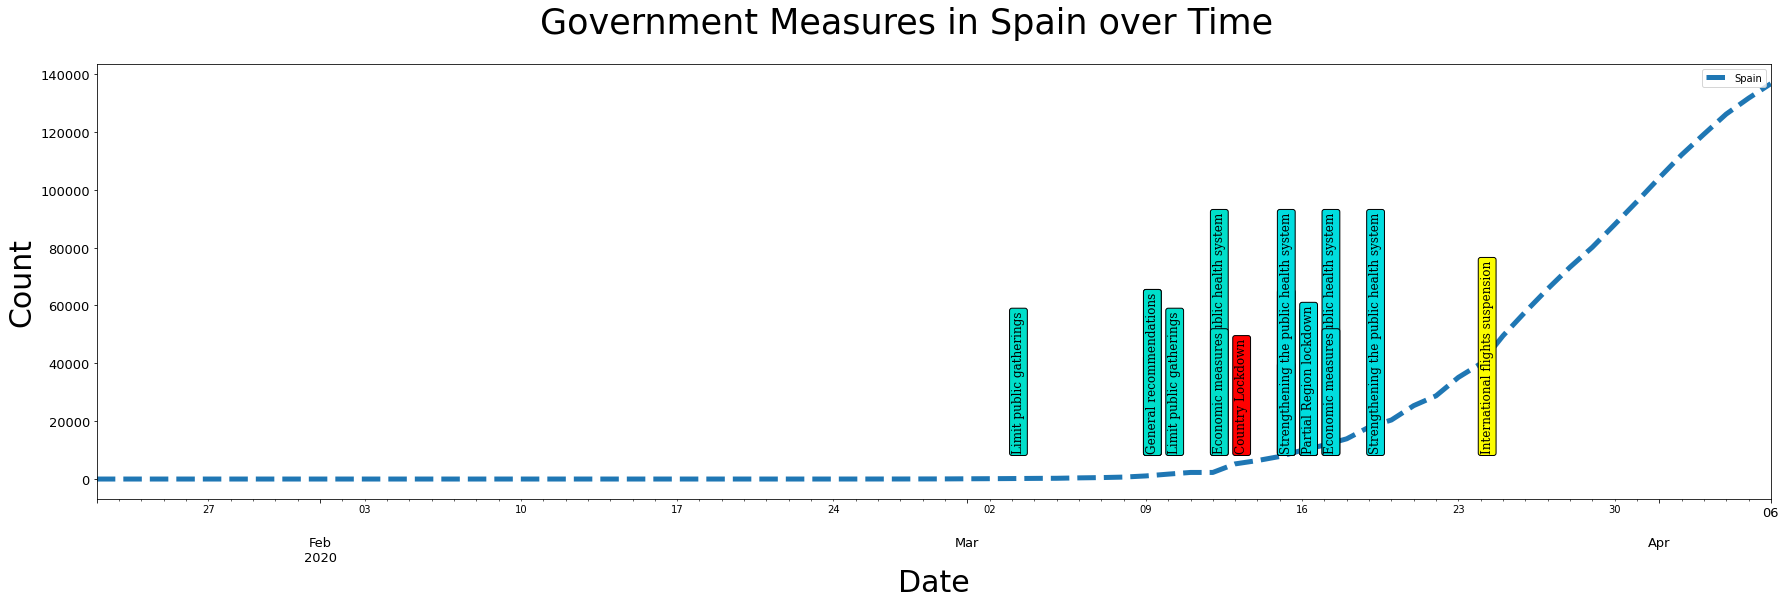

In [0]:
Spain_plot() #Calling Function

#Challenger 7: Ziru Hu
LinkedIn:https://www.linkedin.com/in/ziru-hu/

In [0]:
# Plot1: Airlines Stock Price vs. Global increase rate of confirmed cases
# BEFORE importing the datasets, 
# I downloaded the historical stock data (01/02/2020 - 04/01/2020) of American Airline, Delta, Southwest, United Airlines and Alaska Airlines from 
# https://finance.yahoo.com/ 
AAL = pd.read_csv('https://raw.githubusercontent.com/Gianna096/Gianna/master/AAL.csv')
DAL = pd.read_csv('https://raw.githubusercontent.com/Gianna096/Gianna/master/DAL.csv')
LUV = pd.read_csv('https://raw.githubusercontent.com/Gianna096/Gianna/master/LUV.csv')
UAL = pd.read_csv('https://raw.githubusercontent.com/Gianna096/Gianna/master/UAL.csv')
ALK = pd.read_csv('https://raw.githubusercontent.com/Gianna096/Gianna/master/UAL.csv')
list = [AAL,DAL,LUV,UAL,ALK]
for airline in list:
  print(airline.shape)  
AAL = AAL[['Date','Adj Close']]
DAL = DAL[['Date','Adj Close']]
LUV = LUV[['Date','Adj Close']]
UAL = UAL[['Date','Adj Close']]
ALK = ALK[['Date','Adj Close']]
AAL.rename(columns={'Adj Close':'AAL'},inplace=True)
DAL.rename(columns={'Adj Close':'DAL'},inplace=True)
LUV.rename(columns={'Adj Close':'LUV'},inplace=True)
UAL.rename(columns={'Adj Close':'UAL'},inplace=True)
ALK.rename(columns={'Adj Close':'ALK'},inplace=True)
AAL["Date"] = pd.to_datetime(AAL['Date'])
DAL["Date"] = pd.to_datetime(DAL['Date'])
LUV["Date"] = pd.to_datetime(LUV['Date'])
UAL["Date"] = pd.to_datetime(UAL['Date'])
ALK["Date"] = pd.to_datetime(ALK['Date'])
# US confirmed cases data
confirmed = 'https://covid.ourworldindata.org/data/ecdc/total_cases.csv'
confirmed = pd.read_csv(confirmed)
confirmed.head()
confirmed = pd.DataFrame(confirmed.iloc[2:,0:2])
confirmed['New_Case']=confirmed['World'].diff()
confirmed['pctChange'] = confirmed['World'].pct_change()
confirmed.head()
confirmed = confirmed.rename(columns={"date": "Date","World": "Total_Case"})
confirmed['Date']= pd.to_datetime(confirmed['Date'])

(63, 7)
(63, 7)
(63, 7)
(63, 7)
(63, 7)


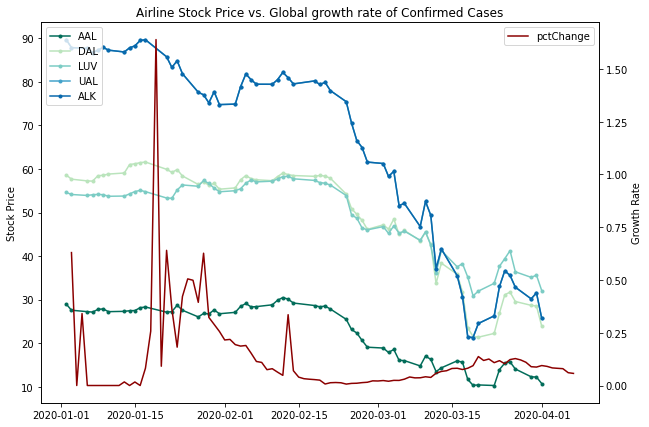

In [0]:
# make line plot 
from matplotlib.font_manager import FontProperties
font0 = FontProperties()
alignment = {'horizontalalignment': 'center', 'verticalalignment': 'baseline'}
font1 = font0.copy()
font1.set_size('large')
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(111)
ax1.plot('Date', 'AAL', data=AAL,marker='o',markersize=3, color='#016c59')
ax1.plot('Date', 'DAL', data=DAL,marker='o',markersize=3, color='#bae4bc')
ax1.plot('Date', 'LUV', data=LUV,marker='o',markersize=3, color='#7bccc4')
ax1.plot('Date', 'UAL', data=UAL,marker='o',markersize=3, color='#43a2ca')
ax1.plot('Date', 'ALK', data=ALK,marker='o',markersize=3, color='#0868ac')
ax1.set_ylabel('Stock Price')
ax1.set_title("Airline Stock Price vs. Global growth rate of Confirmed Cases")
ax1.legend(loc='upper left')

ax2 = ax1.twinx()  # this is the important function
ax2.plot(confirmed.Date, 'pctChange', data=confirmed,color='darkred')
ax2.set_ylabel('Growth Rate')
ax2.set_xlabel('Same X for both exp(-x) and ln(x)')
ax2.legend(loc='upper right')
plt.show()

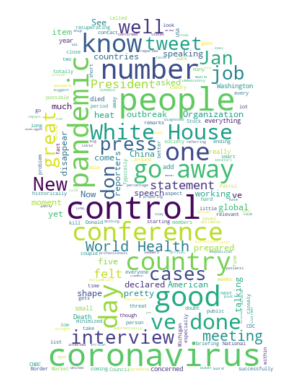

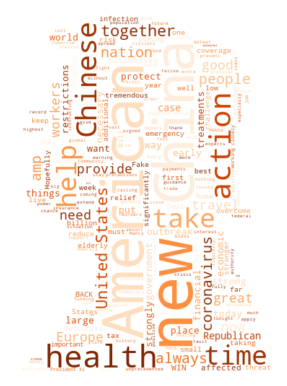

In [0]:
# Plot2: I'm making a wordcloud of the president's statements before and after the epidemic outbroke
!pip install wordcloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
def google_authenticate():
  from google.colab import auth
  auth.authenticate_user()

  from googleapiclient.discovery import build
  drive_service = build('drive', 'v3')
  return drive_service
drive_service = google_authenticate()
def read_file(file_id):
  file_id = file_id

  import io
  from googleapiclient.http import MediaIoBaseDownload

  request = drive_service.files().get_media(fileId=file_id)
  downloaded = io.BytesIO()
  downloader = MediaIoBaseDownload(downloaded, request)
  done = False
  while done is False:
    _, done = downloader.next_chunk()

  downloaded.seek(0)
  return downloaded

text_file1 = read_file('1uz6-TKzsivJyEjo3cuLuFomBBFglteE9') # file id of the picture
document1 = text_file1.read().decode('utf-8')
text_file2 = read_file('1GHA1EvXTXRkWSHk9dzgd5Udgj4QdJj-y') # file id of the picture
document2 = text_file2.read().decode('utf-8')

# remove stopwords
stopwords = set(STOPWORDS)
stopwords.add("said")
stopwords.add("Trump")
stopwords.add("March")
stopwords.add("Feb")
stopwords.add("think")
stopwords.add("going")
stopwords.add("re")
stopwords.add("April")
stopwords.add("Virus")
stopwords.add("will")
# generate word cloud

# create mask
image_file = read_file('11ve3NB-xh1nwuG2314JmoeM8DE03LF64')
trump_mask = np.array(Image.open(image_file))

wc1 = WordCloud(background_color="white",max_words=2000, mask=trump_mask,
               stopwords=stopwords)
wc2 = WordCloud(background_color="white",colormap="Oranges",max_words=2000, mask=trump_mask,
               stopwords=stopwords)

plt.figure(figsize=(6,4), dpi=120)
plt.imshow(wc1.generate(document1), interpolation='bilinear')
plt.axis("off")
plt.show()

plt.figure(figsize=(6,4), dpi=120)
plt.imshow(wc2.generate(document2), interpolation='bilinear')
plt.axis("off")
plt.show()



#Challenger 8: Hyejin Jeon
LinkedIn:

TypeError: ignored

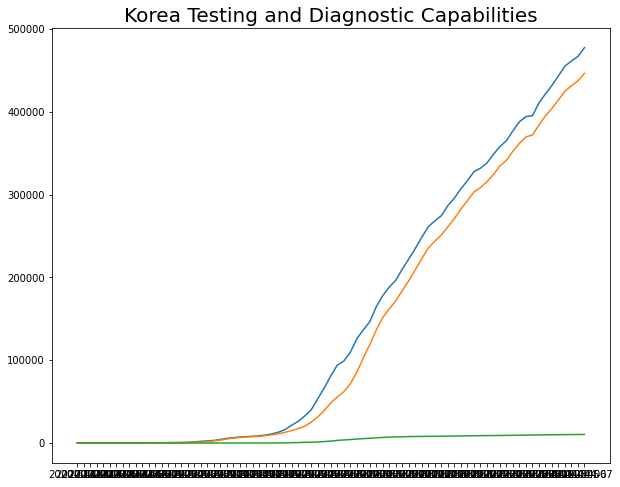

In [0]:
# Download Confirmed cases data 
url = 'https://raw.githubusercontent.com/jihoo-kim/Data-Science-for-COVID-19/master/dataset/Patient/PatientInfo.csv'
KOREA_CONFIRMED_Patient = pd.read_csv(url)
KOREA_CONFIRMED_Patient.head()

# Download Confirmed cases Patients route data 
url = 'https://raw.githubusercontent.com/jihoo-kim/Data-Science-for-COVID-19/master/dataset/Patient/PatientRoute.csv'
KOREA_CONFIRMED_Patient_Route = pd.read_csv(url)
KOREA_CONFIRMED_Patient_Route.head()

# Download Korea Region
url = 'https://raw.githubusercontent.com/jihoo-kim/Data-Science-for-COVID-19/master/dataset/Region.csv'
KOREA_Region = pd.read_csv(url)

# Check the number of regional confirmed patients
regional_patients = pd.merge(KOREA_CONFIRMED_Patient[['patient_id','confirmed_date','sex','age','province','city']],KOREA_Region[['province','city','latitude','longitude']], how = 'left', on = ['province','city'])

# check the missing values and drop the missing values
Clean_regional_patients = regional_patients.dropna()

# Make the heat MAP
# We can see that many covid-confirmed people from Seoul, Daegu, Ulsan which are big city in Korea
heat_data = Clean_regional_patients\
.groupby(['latitude','longitude'])['patient_id'].count().reset_index()\
.values\
.tolist()

Korea_MAP = folium.Map([37, 128], zoom_start=7, tiles='Stamen Terrain') 
folium.plugins.HeatMap(heat_data).add_to(Korea_MAP)

# Get coordinates where your mouse point
plugins.Fullscreen(position='topright',  
                   title='Click to Expand', 
                   title_cancel='Click to Exit', 
                   force_separate_button=True).add_to(Korea_MAP)

plugins.MousePosition().add_to(Korea_MAP) 

# Coronavirus cases have dropped sharply in South Korea. What’s the secret to its success?
# How South Korea is handling the coronavirus outbreak better than other countries
# From drive-thru testing to GPS tracking, South Korea has handled its cases in innovative ways.
# I think korean have good systme of Test & Diagnostic capabilities
# Korean has been designed and implemented drive-through(DT) for safe and efficient screening for COVID-19
# We can see this plot and how koreanㄴ did the covid-19 test so enormous
url = 'https://raw.githubusercontent.com/jihoo-kim/Data-Science-for-COVID-19/master/dataset/Time/Time.csv'
time = pd.read_csv(url)

plt.figure(figsize=(10, 8))
plt.title('Korea Testing and Diagnostic Capabilities', fontsize=20)

plt.plot(time.date, time.test, label='test')
plt.plot(time.date, time.negative, label='negative')
plt.plot(time.date, time.confirmed, label='Confirmed')

plt.scatter(list(time['date'])[-1], list(time['test'])[-1])
plt.text(list(time['date'])[-3], list(time['test'])[-1]+7000, list(time['test'])[-1])
plt.scatter(list(time['date'])[-1], list(time['negative'])[-1])
plt.text(list(time['date'])[-3], list(time['negative'])[-1]+7000, list(time['negative'])[-1])
plt.scatter(list(time['date'])[-1], list(time['confirmed'])[-1])
plt.text(list(time['date'])[-2], list(time['confirmed'])[-1]+7000, list(time['confirmed'])[-1])

plt.xticks(['2020-01-20','2020-01-27',
            '2020-02-03','2020-02-10','2020-02-17','2020-02-24',
            '2020-03-02','2020-03-09','2020-03-16','2020-03-23','2020-03-30'])
plt.xticks(rotation=30)
plt.legend(fontsize=12)

plt.show()

In [0]:
Korea_MAP

#Challenger 9: Yue Zhou
LinkedIn: https://www.linkedin.com/in/yue-zhou-a3170a1a6/

In [0]:
pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=844b5fdb8d9f69a4bce79aa49bbfeed164004f6c4336921bc6fcb0a0ae49eef7
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [0]:
import yfinance as yf
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors
from matplotlib.patches import Polygon
import matplotlib.ticker as ticker
import matplotlib.image as image
from datetime import timedelta

In [0]:
# import the stock datasets from yfinance
# including 14 companies from IT, technology and medium industries: 
# Alphabet, Microsoft, Apple, Disney, Facebook, IBM, Intel, Netflix, NVIDA, Pinterest, Shopify, Slack, Snapchat and Twitter
# the time series duration is 3 months
Alphabet = yf.Ticker('GOOG').history(period = '3mo')
Microsoft = yf.Ticker('MSFT').history(period = '3mo')
Apple = yf.Ticker('AAPL').history(period = '3mo')
Disney = yf.Ticker('DIS').history(period = '3mo')
Facebook = yf.Ticker('FB').history(period = '3mo')
IBM = yf.Ticker('IBM').history(period = '3mo')
Intel = yf.Ticker('INTC').history(period = '3mo')
Netflix = yf.Ticker('NFLX').history(period = '3mo')
NVIDA = yf.Ticker('NVDA').history(period = '3mo')
Pinterest = yf.Ticker('PINS').history(period = '3mo')
Shopify = yf.Ticker('SHOP').history(period = '3mo')
Slack = yf.Ticker('WORK').history(period = '3mo')
Snapchat = yf.Ticker('SNAP').history(period = '3mo')
Twitter = yf.Ticker('TWTR').history(period = '3mo')

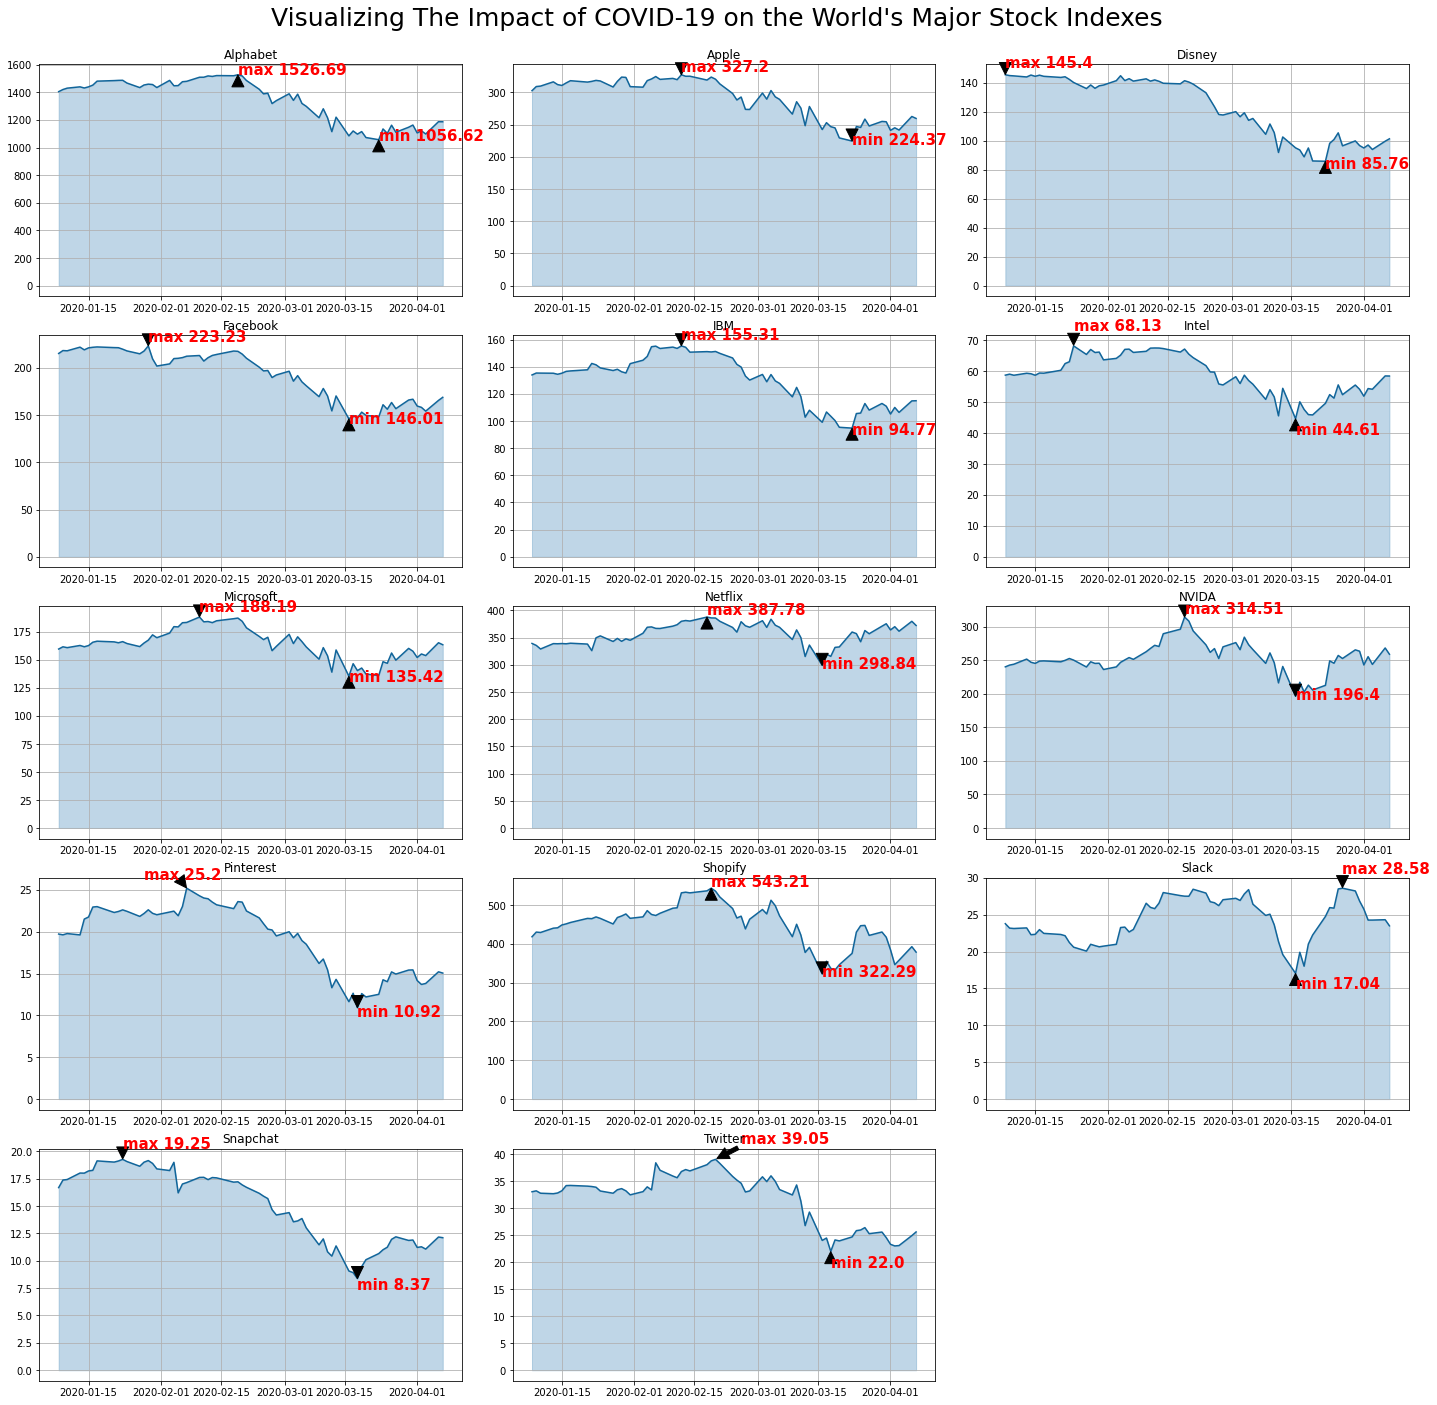

In [0]:
# plot the trends of different companies in one plot
# mark the maximum and minimum value
fig, ax = plt.subplots(5,3)
fig.set_size_inches(20,20)
fig.suptitle("Visualizing The Impact of COVID-19 on the World's Major Stock Indexes",fontsize = 25)
fig.subplots_adjust(top=0.94)
fig.tight_layout(pad = 2)
ax[0][0].plot(Alphabet.index, Alphabet.Close, color = '#11659a')
ax[0][0].grid()
ax[0][0].fill_between(x = Alphabet.index, y1 = Alphabet.Close, y2 = 0, color = '#619ac3', alpha = 0.4 )
maxpoint = max(Alphabet.Close)
minpoint = min(Alphabet.Close)
maxpos = Alphabet[Alphabet.Close == maxpoint].index
minpos = Alphabet[Alphabet.Close == minpoint].index
ax[0][0].annotate('max '+str(maxpoint), xy=(maxpos, maxpoint), xytext=(maxpos, maxpoint+5), color = 'red', fontsize = 15,
            weight = 'bold', arrowprops=dict(facecolor='black', shrink=0.05))
ax[0][0].annotate('min '+str(minpoint), xy=(minpos, minpoint), xytext=(minpos, minpoint-5),color = 'red', fontsize = 15,
            weight = 'bold', arrowprops=dict(facecolor='black', shrink=0.05))
ax[0][0].title.set_text('Alphabet')
ax[0][1].plot(Apple.index, Apple.Close, color = '#11659a')
ax[0][1].grid()
ax[0][1].fill_between(x = Apple.index, y1 = Apple.Close, y2 = 0, color = '#619ac3', alpha = 0.4 )
maxpoint = max(Apple.Close)
minpoint = min(Apple.Close)
maxpos = Apple[Apple.Close == maxpoint].index
minpos = Apple[Apple.Close == minpoint].index
ax[0][1].annotate('max '+str(maxpoint), xy=(maxpos, maxpoint), xytext=(maxpos, maxpoint+5), color = 'red', fontsize = 15,
            weight = 'bold', arrowprops=dict(facecolor='black', shrink=0.05))
ax[0][1].annotate('min '+str(minpoint), xy=(minpos, minpoint), xytext=(minpos, minpoint-5),color = 'red', fontsize = 15,
            weight = 'bold', arrowprops=dict(facecolor='black', shrink=0.05))
ax[0][1].title.set_text('Apple')
ax[0][2].plot(Disney.index, Disney.Close, color = '#11659a')
ax[0][2].grid()
ax[0][2].fill_between(x = Disney.index, y1 = Disney.Close, y2 = 0, color = '#619ac3', alpha = 0.4 )
maxpoint = max(Disney.Close)
minpoint = min(Disney.Close)
maxpos = Disney[Disney.Close == maxpoint].index
minpos = Disney[Disney.Close == minpoint].index
ax[0][2].annotate('max '+str(maxpoint), xy=(maxpos, maxpoint), xytext=(maxpos, maxpoint+5), color = 'red', fontsize = 15,
            weight = 'bold', arrowprops=dict(facecolor='black', shrink=0.05))
ax[0][2].annotate('min '+str(minpoint), xy=(minpos, minpoint), xytext=(minpos, minpoint-5),color = 'red', fontsize = 15,
            weight = 'bold', arrowprops=dict(facecolor='black', shrink=0.05))
ax[0][2].title.set_text('Disney')
ax[1][0].plot(Facebook.index, Facebook.Close, color = '#11659a')
ax[1][0].grid()
ax[1][0].fill_between(x = Facebook.index, y1 = Facebook.Close, y2 = 0, color = '#619ac3', alpha = 0.4 )
maxpoint = max(Facebook.Close)
minpoint = min(Facebook.Close)
maxpos = Facebook[Facebook.Close == maxpoint].index
minpos = Facebook[Facebook.Close == minpoint].index
ax[1][0].annotate('max '+str(maxpoint), xy=(maxpos, maxpoint), xytext=(maxpos, maxpoint+5), color = 'red', fontsize = 15,
            weight = 'bold', arrowprops=dict(facecolor='black', shrink=0.05))
ax[1][0].annotate('min '+str(minpoint), xy=(minpos, minpoint), xytext=(minpos, minpoint-5),color = 'red', fontsize = 15,
            weight = 'bold', arrowprops=dict(facecolor='black', shrink=0.05))
ax[1][0].title.set_text('Facebook')
ax[1][1].plot(IBM.index, IBM.Close, color = '#11659a')
ax[1][1].grid()
ax[1][1].fill_between(x = IBM.index, y1 = IBM.Close, y2 = 0, color = '#619ac3', alpha = 0.4 )
maxpoint = max(IBM.Close)
minpoint = min(IBM.Close)
maxpos = IBM[IBM.Close == maxpoint].index
minpos = IBM[IBM.Close == minpoint].index
ax[1][1].annotate('max '+str(maxpoint), xy=(maxpos, maxpoint), xytext=(maxpos, maxpoint+5), color = 'red', fontsize = 15,
            weight = 'bold', arrowprops=dict(facecolor='black', shrink=0.05))
ax[1][1].annotate('min '+str(minpoint), xy=(minpos, minpoint), xytext=(minpos, minpoint-5),color = 'red', fontsize = 15,
            weight = 'bold', arrowprops=dict(facecolor='black', shrink=0.05))
ax[1][1].title.set_text('IBM')
ax[1][2].plot(Intel.index, Intel.Close, color = '#11659a')
ax[1][2].grid()
ax[1][2].fill_between(x = Intel.index, y1 = Intel.Close, y2 = 0, color = '#619ac3', alpha = 0.4 )
maxpoint = max(Intel.Close)
minpoint = min(Intel.Close)
maxpos = Intel[Intel.Close == maxpoint].index
minpos = Intel[Intel.Close == minpoint].index
ax[1][2].annotate('max '+str(maxpoint), xy=(maxpos, maxpoint), xytext=(maxpos, maxpoint+5), color = 'red', fontsize = 15,
            weight = 'bold', arrowprops=dict(facecolor='black', shrink=0.05))
ax[1][2].annotate('min '+str(minpoint), xy=(minpos, minpoint), xytext=(minpos, minpoint-5),color = 'red', fontsize = 15,
            weight = 'bold', arrowprops=dict(facecolor='black', shrink=0.05))
ax[1][2].title.set_text('Intel')
ax[2][0].plot(Microsoft.index, Microsoft.Close, color = '#11659a')
ax[2][0].grid()
ax[2][0].fill_between(x = Microsoft.index, y1 = Microsoft.Close, y2 = 0, color = '#619ac3', alpha = 0.4 )
maxpoint = max(Microsoft.Close)
minpoint = min(Microsoft.Close)
maxpos = Microsoft[Microsoft.Close == maxpoint].index
minpos = Microsoft[Microsoft.Close == minpoint].index
ax[2][0].annotate('max '+str(maxpoint), xy=(maxpos, maxpoint), xytext=(maxpos, maxpoint+5), color = 'red', fontsize = 15,
            weight = 'bold', arrowprops=dict(facecolor='black', shrink=0.05))
ax[2][0].annotate('min '+str(minpoint), xy=(minpos, minpoint), xytext=(minpos, minpoint-5),color = 'red', fontsize = 15,
            weight = 'bold', arrowprops=dict(facecolor='black', shrink=0.05))
ax[2][0].title.set_text('Microsoft')
ax[2][1].plot(Netflix.index, Netflix.Close, color = '#11659a')
ax[2][1].grid()
ax[2][1].fill_between(x = Netflix.index, y1 = Netflix.Close, y2 = 0, color = '#619ac3', alpha = 0.4 )
maxpoint = max(Netflix.Close)
minpoint = min(Netflix.Close)
maxpos = Netflix[Netflix.Close == maxpoint].index
minpos = Netflix[Netflix.Close == minpoint].index
ax[2][1].annotate('max '+str(maxpoint), xy=(maxpos, maxpoint), xytext=(maxpos, maxpoint+5), color = 'red', fontsize = 15,
            weight = 'bold', arrowprops=dict(facecolor='black', shrink=0.05))
ax[2][1].annotate('min '+str(minpoint), xy=(minpos, minpoint), xytext=(minpos, minpoint-5),color = 'red', fontsize = 15,
            weight = 'bold', arrowprops=dict(facecolor='black', shrink=0.05))
ax[2][1].title.set_text('Netflix')
ax[2][2].plot(NVIDA.index, NVIDA.Close, color = '#11659a')
ax[2][2].grid()
ax[2][2].fill_between(x = NVIDA.index, y1 = NVIDA.Close, y2 = 0, color = '#619ac3', alpha = 0.4 )
maxpoint = max(NVIDA.Close)
minpoint = min(NVIDA.Close)
maxpos = NVIDA[NVIDA.Close == maxpoint].index
minpos = NVIDA[NVIDA.Close == minpoint].index
ax[2][2].annotate('max '+str(maxpoint), xy=(maxpos, maxpoint), xytext=(maxpos, maxpoint+5), color = 'red', fontsize = 15,
            weight = 'bold', arrowprops=dict(facecolor='black', shrink=0.05))
ax[2][2].annotate('min '+str(minpoint), xy=(minpos, minpoint), xytext=(minpos, minpoint-5),color = 'red', fontsize = 15,
            weight = 'bold', arrowprops=dict(facecolor='black', shrink=0.05))
ax[2][2].title.set_text('NVIDA')
ax[3][0].plot(Pinterest.index, Pinterest.Close, color = '#11659a')
ax[3][0].grid()
ax[3][0].fill_between(x = Pinterest.index, y1 = Pinterest.Close, y2 = 0, color = '#619ac3', alpha = 0.4 )
maxpoint = max(Pinterest.Close)
minpoint = min(Pinterest.Close)
maxpos = Pinterest[Pinterest.Close == maxpoint].index
minpos = Pinterest[Pinterest.Close == minpoint].index
ax[3][0].annotate('max '+str(maxpoint), xy=(maxpos, maxpoint), xytext=(maxpos-timedelta(days = 10), maxpoint+1), color = 'red', fontsize = 15,
            weight = 'bold', arrowprops=dict(facecolor='black', shrink=0.05))
ax[3][0].annotate('min '+str(minpoint), xy=(minpos, minpoint), xytext=(minpos, minpoint-1),color = 'red', fontsize = 15,
            weight = 'bold', arrowprops=dict(facecolor='black', shrink=0.05))
ax[3][0].title.set_text('Pinterest')
ax[3][1].plot(Shopify.index, Shopify.Close, color = '#11659a')
ax[3][1].grid()
ax[3][1].fill_between(x = Shopify.index, y1 = Shopify.Close, y2 = 0, color = '#619ac3', alpha = 0.4 )
maxpoint = max(Shopify.Close)
minpoint = min(Shopify.Close)
maxpos = Shopify[Shopify.Close == maxpoint].index
minpos = Shopify[Shopify.Close == minpoint].index
ax[3][1].annotate('max '+str(maxpoint), xy=(maxpos, maxpoint), xytext=(maxpos, maxpoint+5), color = 'red', fontsize = 15,
            weight = 'bold', arrowprops=dict(facecolor='black', shrink=0.05))
ax[3][1].annotate('min '+str(minpoint), xy=(minpos, minpoint), xytext=(minpos, minpoint-5),color = 'red', fontsize = 15,
            weight = 'bold', arrowprops=dict(facecolor='black', shrink=0.05))
ax[3][1].title.set_text('Shopify')
ax[3][2].plot(Slack.index, Slack.Close, color = '#11659a')
ax[3][2].grid()
ax[3][2].fill_between(x = Slack.index, y1 = Slack.Close, y2 = 0, color = '#619ac3', alpha = 0.4 )
maxpoint = max(Slack.Close)
minpoint = min(Slack.Close)
maxpos = Slack[Slack.Close == maxpoint].index
minpos = Slack[Slack.Close == minpoint].index
ax[3][2].annotate('max '+str(maxpoint), xy=(maxpos, maxpoint), xytext=(maxpos, maxpoint+2), color = 'red', fontsize = 15,
            weight = 'bold', arrowprops=dict(facecolor='black', shrink=0.05))
ax[3][2].annotate('min '+str(minpoint), xy=(minpos, minpoint), xytext=(minpos, minpoint-2),color = 'red', fontsize = 15,
            weight = 'bold', arrowprops=dict(facecolor='black', shrink=0.05))
ax[3][2].title.set_text('Slack')
ax[4][0].plot(Snapchat.index, Snapchat.Close, color = '#11659a')
ax[4][0].grid()
ax[4][0].fill_between(x = Snapchat.index, y1 = Snapchat.Close, y2 = 0, color = '#619ac3', alpha = 0.4 )
maxpoint = max(Snapchat.Close)
minpoint = min(Snapchat.Close)
maxpos = Snapchat[Snapchat.Close == maxpoint].index
minpos = Snapchat[Snapchat.Close == minpoint].index
ax[4][0].annotate('max '+str(maxpoint), xy=(maxpos, maxpoint), xytext=(maxpos, maxpoint+1), color = 'red', fontsize = 15,
            weight = 'bold', arrowprops=dict(facecolor='black', shrink=0.05))
ax[4][0].annotate('min '+str(minpoint), xy=(minpos, minpoint), xytext=(minpos, minpoint-1),color = 'red', fontsize = 15,
            weight = 'bold', arrowprops=dict(facecolor='black', shrink=0.05))
ax[4][0].title.set_text('Snapchat')
ax[4][1].plot(Twitter.index, Twitter.Close, color = '#11659a')
ax[4][1].grid()
ax[4][1].fill_between(x = Twitter.index, y1 = Twitter.Close, y2 = 0, color = '#619ac3', alpha = 0.4 )
maxpoint = max(Twitter.Close)
minpoint = min(Twitter.Close)
maxpos = Twitter[Twitter.Close == maxpoint].index
minpos = Twitter[Twitter.Close == minpoint].index
ax[4][1].annotate('max '+str(maxpoint), xy=(maxpos, maxpoint), xytext=(maxpos+timedelta(days=6), maxpoint+3), color = 'red', fontsize = 15,
            weight = 'bold', arrowprops=dict(facecolor='black', shrink=0.05))
ax[4][1].annotate('min '+str(minpoint), xy=(minpos, minpoint), xytext=(minpos, minpoint-3),color = 'red', fontsize = 15,
            weight = 'bold', arrowprops=dict(facecolor='black', shrink=0.05))
ax[4][1].title.set_text('Twitter')
fig.subplots_adjust(top=0.94)
fig.delaxes(ax[4][2])

In [0]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

In [0]:
# import the US confirmed and deaths datasets from Github
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
USCONFIRMED = pd.read_csv(url)
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv'
USDEATHS = pd.read_csv(url)
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
CONFIRMED = pd.read_csv(url)

In [0]:
# calculate mortality rate of each state in the US
USCONFIRMED = USCONFIRMED.groupby('Province_State',axis = 0).sum()
USDEATHS = USDEATHS.groupby('Province_State',axis = 0).sum()
Ratio = USDEATHS.iloc[:,-1]/USCONFIRMED.iloc[:,-1]
Ratio[Ratio.isna()] = 0
RatioIndex = Ratio.sort_values(axis = 0, ascending= False)

In [0]:
# define a function to draw the subplot for visualizing
def Challenge(x): 
  COUNTRYCONFIRMED = CONFIRMED.iloc[:,[1,-1]]
  sum_COUNTRYCONFIRMED = COUNTRYCONFIRMED.groupby(COUNTRYCONFIRMED.columns[0],axis = 0).sum()
  COUNTRYINDEX = sum_COUNTRYCONFIRMED[sum_COUNTRYCONFIRMED.columns[-1]].sort_values(axis = 0, ascending= False).head(x)
  RatioIndexTmp = RatioIndex.head(x)
  # Initialize figure with subplots
  fig = make_subplots(
    rows=2, cols=2,
    column_widths=[0.5, 0.5],
    row_heights=[.5, .5],
    specs=[[{'type': 'Scatter', 'colspan': 2}, None],
           [{'type': 'bar'}, {'type': 'Pie'}]],
    subplot_titles=('Confirmed Cases Trends for Top '+str(x)+' Affected Countires','Confirmed Cases Updated for Top '+str(x)+' Affected Countires', 
                    'Top '+str(x)+' Covid 19 Mortality Rate in the US, by state')
    )
  # Add first subplot(time series)
  for i in np.arange(0,x):
    y = CONFIRMED[CONFIRMED['Country/Region']== COUNTRYINDEX.index[i]]
    sum_y = y.sum(axis=0)
    sum_y = pd.DataFrame(sum_y)
    sum_y = sum_y.iloc[4:]
    sum_y.rename(columns={0: 'ConfirmedCases'}, inplace=True)
    a = len(sum_y)
    fig.add_trace(go.Scatter(x=sum_y.index, y=sum_y['ConfirmedCases'],name = COUNTRYINDEX.index[i], mode='lines'), 
    row = 1, col = 1)
  # Add second subplot(bar plot)
  fig.add_trace(
    go.Bar(x = COUNTRYINDEX.index, y = COUNTRYINDEX, showlegend= False),
    row=2, col=1
  )
  # Add third subplot(pie chart)
  fig.add_trace(go.Pie(labels = RatioIndexTmp.index,values = RatioIndexTmp),
                row = 2, col = 2
  )
  # Rotate x-axis labels
  fig.update_xaxes(tickangle=-45)
  # Set theme, margin and font size in layout
  fig.update_layout(
    template='plotly_dark',
    margin=dict(r=10, t=25, b=40, l=60),
    font = dict(size = 10)
  )
  fig.show()

In [0]:
Challenge(15)